# MNIST Digit Classification with Convolutional Neural Network (CNN)

**Discipline(s):** Computer Vision, Deep Learning

colab에서 돌릴 경우, 런타임 유형을 GPU로 변경해주세요.

## 1. Import Statements

---



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

## 2. Data Preprocessing

---



The first step is to preprocess our data.

In [2]:
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [16]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset  = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.03MB/s]


In [17]:
X_train = train_dataset.data
y_train = train_dataset.targets
X_test = test_dataset.data
y_test = test_dataset.targets

print("Training Images:", X_train.shape)  # [60000, 28, 28]
print("Testing Images:", X_test.shape)    # [10000, 28, 28]
print("Training Labels:", y_train.shape)  # [60000]
print("Test Labels:", y_test.shape)       # [10000]

Training Images: torch.Size([60000, 28, 28])
Testing Images: torch.Size([10000, 28, 28])
Training Labels: torch.Size([60000])
Test Labels: torch.Size([10000])


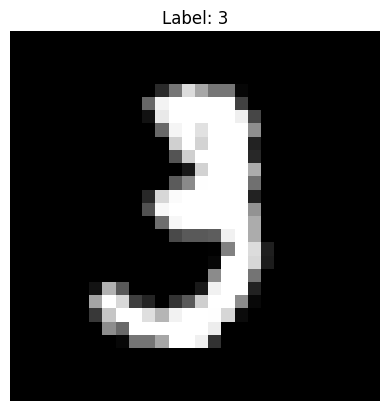

In [19]:
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {y_train[10].item()}")
plt.axis('off')
plt.show()

## 3. Convolutional Neural Network (CNN)

---



### 3.1. Define the Model

We then have to define our convolutional neural network.

In [7]:
# CNN 모델 정의 -> 차원이 어떻게 될지 생각하면서 코드 빈칸을 채워주세요.
class SimpleCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), # 32 x 28 x 28
            # activation function
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2), # 32 x 14 x 14

            # 모델을 더 깊게 쌓아도 됩니다.

            # fully connected layer 전, flatten 과정 필요
            nn.Flatten(), # [32,14,14] -> 6272
            nn.Linear(32 * 14 * 14, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.net(x)

In [8]:
# 모델 준비
model = SimpleCNN().to(DEVICE)

Once our model is defined, we can compile it using the Adam optimizer and the categorical cross-entropy loss function.

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

### 3.2. Train the Model

In [20]:
def train(model, loader):
    model.train()
    total_loss = 0
    correct = 0
    total = 0
    for x, y in loader:
        x, y = x.to(DEVICE), y.to(DEVICE)
        optimizer.zero_grad()
        output = model(x)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * y.size(0)
        correct += (output.argmax(dim=1) == y).sum().item()
        total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [21]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(DEVICE), y.to(DEVICE)
            output = model(x)
            loss = criterion(output, y)

            total_loss += loss.item() * y.size(0)
            correct += (output.argmax(dim=1) == y).sum().item()
            total += y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total
    return avg_loss, accuracy

In [12]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.1577, Train Acc: 0.9516 | Test Loss: 0.0652, Test Acc: 0.9800
[Epoch 2] Train Loss: 0.0542, Train Acc: 0.9827 | Test Loss: 0.0593, Test Acc: 0.9811
[Epoch 3] Train Loss: 0.0337, Train Acc: 0.9893 | Test Loss: 0.0543, Test Acc: 0.9825
[Epoch 4] Train Loss: 0.0223, Train Acc: 0.9928 | Test Loss: 0.0519, Test Acc: 0.9839
[Epoch 5] Train Loss: 0.0169, Train Acc: 0.9946 | Test Loss: 0.0596, Test Acc: 0.9829
[Epoch 6] Train Loss: 0.0121, Train Acc: 0.9960 | Test Loss: 0.0589, Test Acc: 0.9836
[Epoch 7] Train Loss: 0.0090, Train Acc: 0.9971 | Test Loss: 0.0653, Test Acc: 0.9843
[Epoch 8] Train Loss: 0.0075, Train Acc: 0.9974 | Test Loss: 0.0908, Test Acc: 0.9796
[Epoch 9] Train Loss: 0.0077, Train Acc: 0.9976 | Test Loss: 0.0545, Test Acc: 0.9867
[Epoch 10] Train Loss: 0.0054, Train Acc: 0.9982 | Test Loss: 0.0679, Test Acc: 0.9869


### 3.3. 시각화

Finally, we can plot the curves.

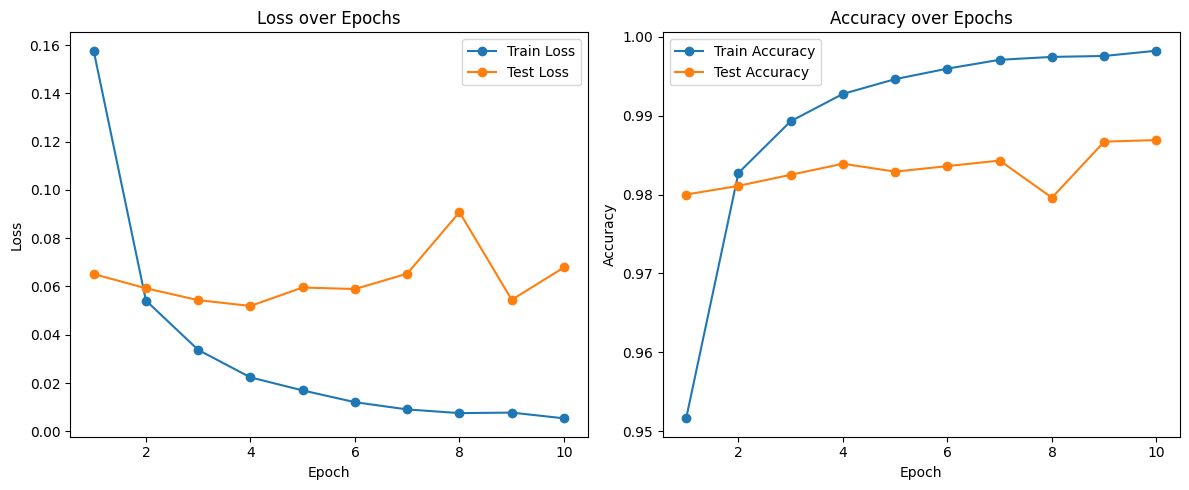

In [13]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

## 4. Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [14]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

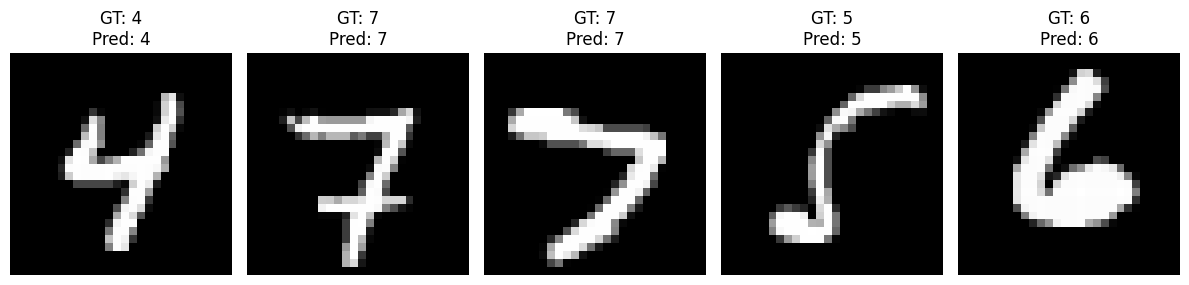

In [15]:
show_random_predictions(model, test_dataset, num_images=5)

## ResNet

In [27]:
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        # batch normalization
        self.bn1 = nn.BatchNorm2d(out_channels)
        # activation function
        self.relu = nn.ReLU(inplace=True)

        # 추가로 layer 등을 더 구현하셔도 됩니다.
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Skip connection: 채널 수가 다르면 어떤 convolution layer를 사용하는게 좋을지 생각해주세요.
        if in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        # 빈칸 채우기
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += identity
        return self.relu(out)

In [29]:
class ResNetLike(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        # layer 등을 추가로 더 쌓으셔도 됩니다.
        self.layer1 = ResidualBlock(16, 32, stride=2)  # (14, 14) → (7, 7)
        self.layer2 = ResidualBlock(32, 64, stride=1)  # (7, 7) → (7, 7)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))    # (7, 7) → (1, 1)

        # 빈칸을 채워주세요.
        self.fc = nn.Linear(64, 10)  # 10 classes for MNIST

    def forward(self, x):
        # 빈칸을 채워주세요.
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avgpool(x)          # output: (B, 64, 1, 1)
        x = torch.flatten(x, 1)      # output: (B, 64)
        x = self.fc(x)               # output: (B, 10)
        return x

In [30]:
model = ResNetLike().to(DEVICE)

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [32]:
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader)
    test_loss, test_acc = evaluate(model, test_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

    print(f"[Epoch {epoch+1}] "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

[Epoch 1] Train Loss: 0.1841, Train Acc: 0.9542 | Test Loss: 0.0396, Test Acc: 0.9880
[Epoch 2] Train Loss: 0.0479, Train Acc: 0.9856 | Test Loss: 0.0354, Test Acc: 0.9887
[Epoch 3] Train Loss: 0.0354, Train Acc: 0.9890 | Test Loss: 0.0345, Test Acc: 0.9886
[Epoch 4] Train Loss: 0.0298, Train Acc: 0.9908 | Test Loss: 0.0395, Test Acc: 0.9873
[Epoch 5] Train Loss: 0.0243, Train Acc: 0.9922 | Test Loss: 0.0515, Test Acc: 0.9832
[Epoch 6] Train Loss: 0.0190, Train Acc: 0.9939 | Test Loss: 0.0373, Test Acc: 0.9870
[Epoch 7] Train Loss: 0.0190, Train Acc: 0.9938 | Test Loss: 0.0234, Test Acc: 0.9923
[Epoch 8] Train Loss: 0.0150, Train Acc: 0.9949 | Test Loss: 0.0278, Test Acc: 0.9919
[Epoch 9] Train Loss: 0.0140, Train Acc: 0.9955 | Test Loss: 0.0209, Test Acc: 0.9936
[Epoch 10] Train Loss: 0.0114, Train Acc: 0.9964 | Test Loss: 0.0314, Test Acc: 0.9900


### 시각화

Finally, we can plot the curves.

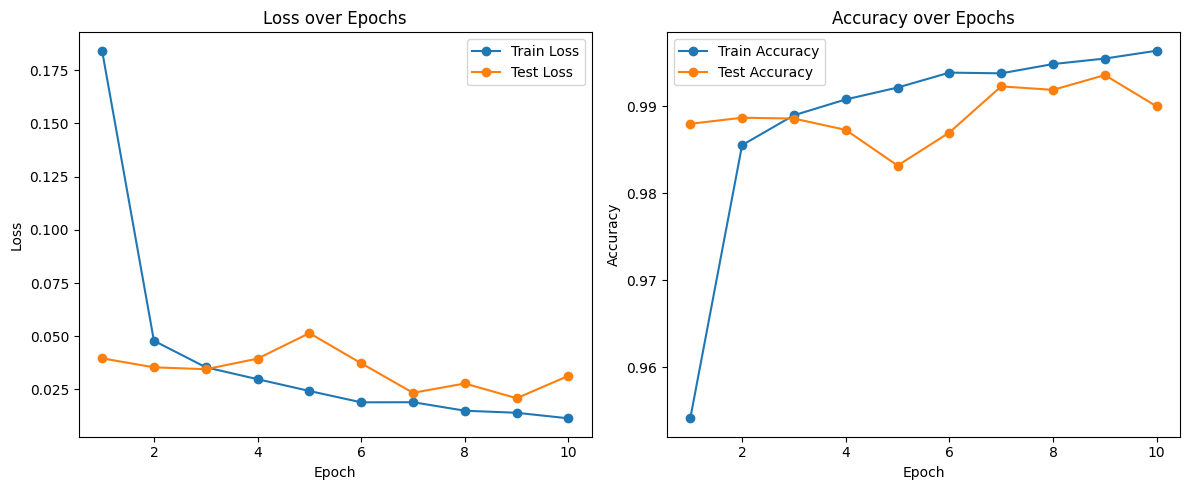

In [33]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

### Make a Prediction

---



Once our model is trained, we can use it to make predictions. To do this, we first use our test set to predict the classes.

In [34]:
def show_random_predictions(model, dataset, num_images=5):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(DEVICE)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(12, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].cpu().squeeze(), cmap='gray')
        plt.title(f"GT: {labels[i].item()}\nPred: {preds[i].item()}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

Finally, we can show a random test image with its corresponding prediction.

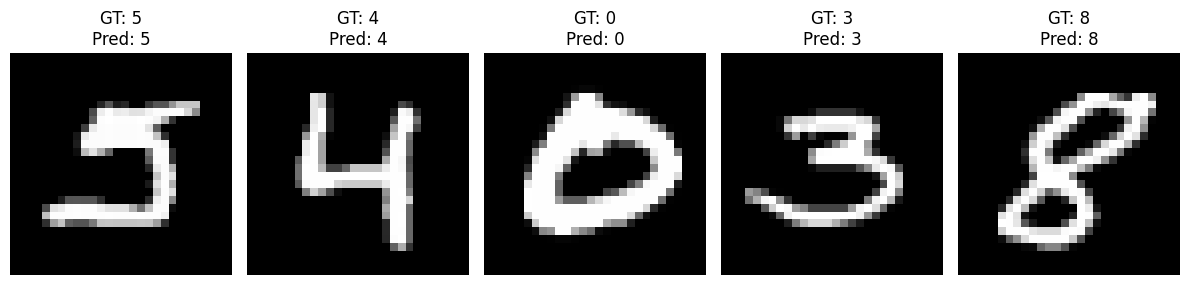

In [35]:
show_random_predictions(model, test_dataset, num_images=5)

# 다른 데이터셋으로도 진행해보기

In [50]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                          download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                         download=True, transform=transform)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

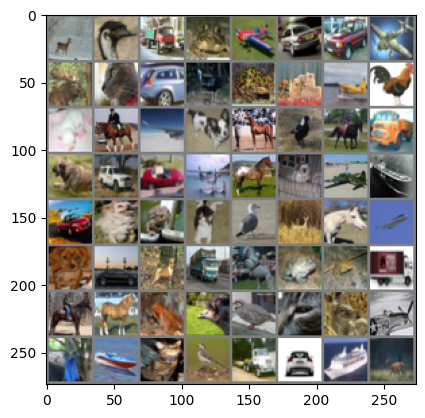

deer       bird       truck      frog       airplane   automobile automobile airplane  


In [51]:
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 클래스 이름
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 복원용 함수 (정규화 복원)
def imshow(img):
    img = img * 0.5 + 0.5  # Normalize 역변환: [-1,1] → [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 데이터 로더에서 배치 하나 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 64개 이미지 출력
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:10s}' for j in range(8)))  # 앞의 8개 클래스 이름만 출력


In [52]:
BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride,
                               padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1,
                               padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        if in_channels != out_channels or stride != 1:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride,
                          bias=False),
                nn.BatchNorm2d(out_channels)
            )
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        identity = self.shortcut(x)

        out = self.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += identity
        out = self.relu(out)
        return out

In [54]:
class ResNetCIFAR10(nn.Module):
    def __init__(self):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False),  # input: 3채널
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2)  # (32x32 → 16x16)
        )

        self.layer1 = ResidualBlock(16, 32, stride=2)  # (16x16 → 8x8)
        self.layer2 = ResidualBlock(32, 64, stride=2)  # (8x8 → 4x4)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # (4x4 → 1x1)
        self.fc = nn.Linear(64, 10)  # CIFAR-10: 클래스 10개

    def forward(self, x):
        x = self.stem(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x

In [55]:
model = ResNetCIFAR10().to(DEVICE)

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [57]:
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    avg_loss = running_loss / total
    acc = correct / total
    return avg_loss, acc


In [58]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_loss = running_loss / total
    acc = correct / total
    return avg_loss, acc


In [59]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
epochs = []

for epoch in range(1, EPOCHS + 1):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, DEVICE)
    test_loss, test_acc = evaluate(model, test_loader, criterion, DEVICE)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    epochs.append(epoch)

    print(f"[Epoch {epoch}] Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Test Loss: {test_loss:.4f}, Acc: {test_acc:.4f}")


[Epoch 1] Train Loss: 1.3569, Acc: 0.5089 | Test Loss: 1.1432, Acc: 0.5852
[Epoch 2] Train Loss: 1.0099, Acc: 0.6385 | Test Loss: 1.0790, Acc: 0.6124
[Epoch 3] Train Loss: 0.8758, Acc: 0.6882 | Test Loss: 0.9005, Acc: 0.6743
[Epoch 4] Train Loss: 0.7856, Acc: 0.7223 | Test Loss: 0.8505, Acc: 0.6957
[Epoch 5] Train Loss: 0.7178, Acc: 0.7473 | Test Loss: 0.8160, Acc: 0.7090
[Epoch 6] Train Loss: 0.6621, Acc: 0.7679 | Test Loss: 0.7823, Acc: 0.7208
[Epoch 7] Train Loss: 0.6160, Acc: 0.7848 | Test Loss: 0.7760, Acc: 0.7272
[Epoch 8] Train Loss: 0.5752, Acc: 0.7980 | Test Loss: 0.7635, Acc: 0.7317
[Epoch 9] Train Loss: 0.5373, Acc: 0.8105 | Test Loss: 0.7960, Acc: 0.7276
[Epoch 10] Train Loss: 0.5097, Acc: 0.8204 | Test Loss: 0.8091, Acc: 0.7234


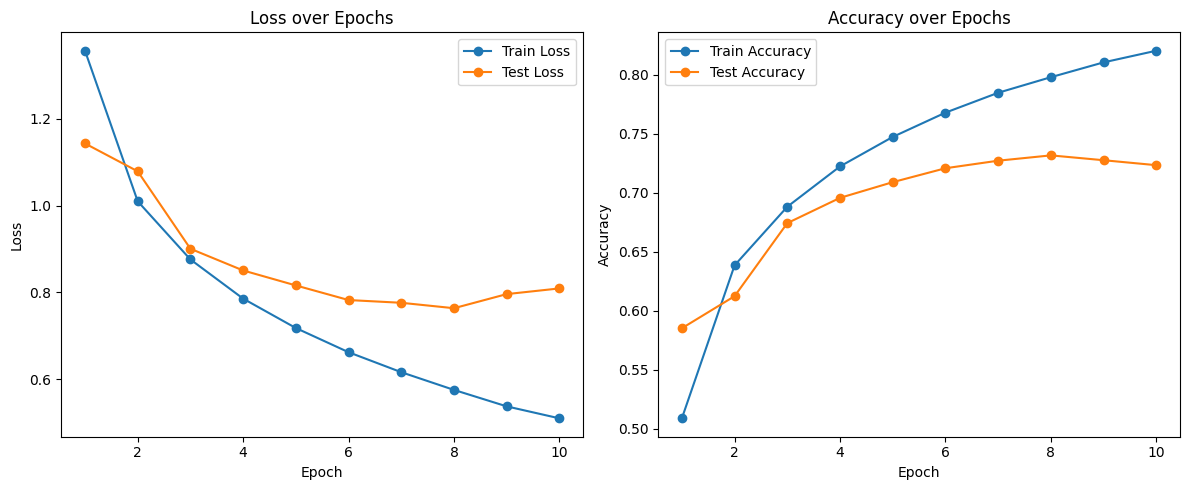

In [60]:
epochs = range(1, EPOCHS + 1)

plt.figure(figsize=(12, 5))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.plot(epochs, test_losses, label='Test Loss', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(epochs, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
# CIFAR-10 클래스 라벨 이름
CIFAR10_CLASSES = ['airplane', 'automobile', 'bird', 'cat', 'deer',
                   'dog', 'frog', 'horse', 'ship', 'truck']

def denormalize(img):
    """ 정규화 해제: [-1,1] → [0,1] """
    img = img * 0.5 + 0.5
    return img

def show_random_predictions(model, dataset, num_images=5, device='cpu'):
    model.eval()

    indices = random.sample(range(len(dataset)), num_images)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    images = images.to(device)
    outputs = model(images)
    preds = outputs.argmax(dim=1)

    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        img = denormalize(images[i].detach().cpu())
        np_img = img.permute(1, 2, 0).numpy()  # C,H,W → H,W,C

        plt.subplot(1, num_images, i + 1)
        plt.imshow(np_img)
        plt.title(f"GT: {CIFAR10_CLASSES[labels[i]]}\nPred: {CIFAR10_CLASSES[preds[i]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

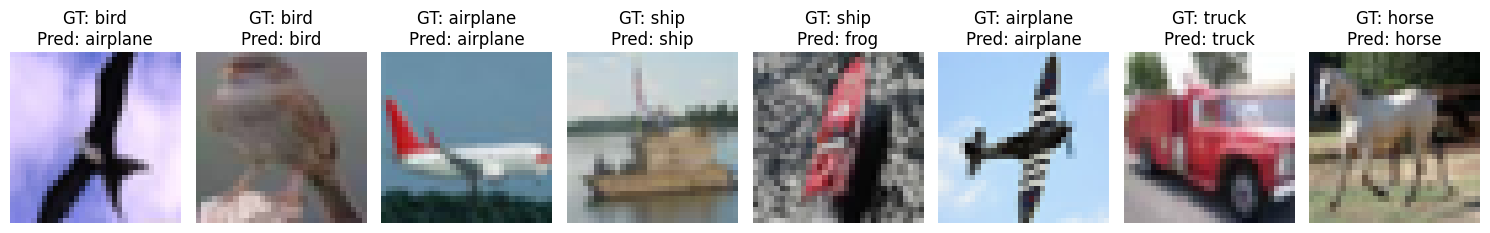

In [64]:
show_random_predictions(model, test_set, num_images=8, device=DEVICE)